# Principal Component Analysis

In [30]:
import numpy as np
import matplotlib.pyplot as plt #Plots
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

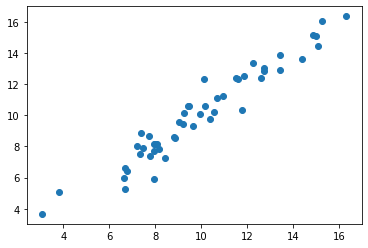

In [2]:
#Two variables that are correlated

np.random.seed(1)

x = np.random.normal(10,3,50)
y = x + np.random.normal(0,1,50)

chrt = plt.scatter(x, y)

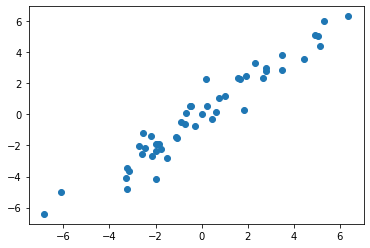

In [3]:
#Center the data

x = x-x.mean()
y = y-y.mean()

chrt = plt.scatter(x, y)

In [4]:
#Obtain variance covariance matrix

m = np.cov(x,y)

print("Variance covariance matrix:\n", m)

Variance covariance matrix:
 [[8.63360245 8.58123425]
 [8.58123425 9.15343141]]


In [5]:
#Eigenvalues and Eigen vectors

Eigvalues, Eigvectors ,= np.linalg.eig(m) #Eigenveectors are in columns

print('\nEigenvalues:\n:',Eigvalues)
print('\nEigenvectors:\n:',Eigvectors)



Eigenvalues:
: [ 0.30834734 17.47868651]

Eigenvectors:
: [[-0.71773074 -0.69632075]
 [ 0.69632075 -0.71773074]]


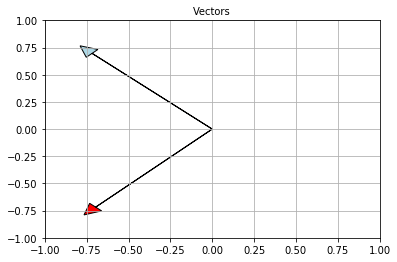

In [6]:
ax = plt.axes()

ax.arrow(0.0, 0.0, Eigvectors[0][0], Eigvectors[1][0], head_width=0.1, head_length=0.1, fc='lightblue', ec='black')
ax.arrow(0.0, 0.0, Eigvectors[0][1], Eigvectors[1][1], head_width=0.1, head_length=0.1, fc='red', ec='black')

plt.grid()

plt.xlim(-1,1)
plt.ylim(-1,1)

plt.title('Vectors',fontsize=10)

plt.show() 
plt.close()

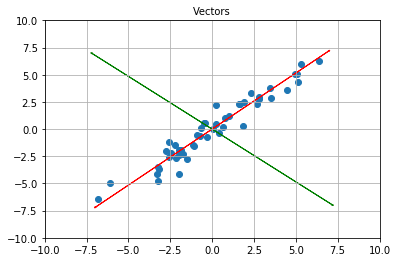

In [7]:
#Overimpose extended vectors and scatter plot

ax = plt.axes()

ax.arrow(0, 0, 10*Eigvectors[0][0], 10*Eigvectors[1][0], head_width=0.1, head_length=0.1, fc='red', ec='green')
ax.arrow(0, 0, 10*Eigvectors[0][1], 10*Eigvectors[1][1], head_width=0.1, head_length=0.1, fc='red', ec='red')
ax.arrow(0, 0, -10*Eigvectors[0][0], -10*Eigvectors[1][0], head_width=0.1, head_length=0.1, fc='red', ec='green')
ax.arrow(0, 0, -10*Eigvectors[0][1], -10*Eigvectors[1][1], head_width=0.1, head_length=0.1, fc='red', ec='red')
ax.scatter(x, y)

plt.grid()

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.title('Vectors',fontsize=10)

plt.show() 
plt.close()

In [8]:
#Feature row vectors matrix

FRV = np.array([Eigvectors[...,1],Eigvectors[...,0]])

print('Feature row vector matrix:\n', FRV)

Feature row vector matrix:
 [[-0.69632075 -0.71773074]
 [-0.71773074  0.69632075]]


(2, 2)
(50, 2)


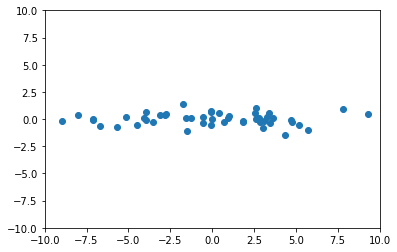

In [9]:
#Data transformation

Data = np.array([x,y]) #Array with original data
Data = Data.T #Transpose the data

print(FRV.shape)
print(Data.shape)

NewData = Data@FRV

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(NewData[...,0], NewData[...,1])

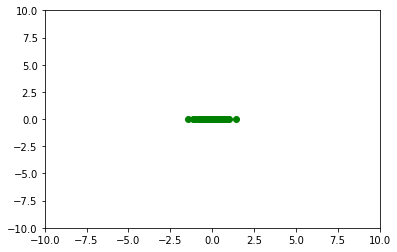

In [10]:
#Reducing dimensionality

Rdata = Data@FRV[...,1]

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(Rdata,np.zeros(50), color='green')

# PCA with large data

In [11]:
import pandas as pd
from sklearn.decomposition import PCA 

import seaborn as sns #Statistical plots


In [12]:
#Importing data

Wine = np.genfromtxt('/Users/catalina/Documents/jupyter_files/1 Psy ML 2020 Spring /wine.data', delimiter=',') #from csv in computer

#Wine = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', delimiter=',') #from internet

print('Object type:', type(Wine))

#np.set_printoptions(suppress=True) #Avoid Scientific notation
print(Wine)

Object type: <class 'numpy.ndarray'>
[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [13]:
#Data cleaning #Do not run twice!!

labels = np.copy(Wine[...,0]) #Notice that labels are clases, not numbers
print(labels)

Wine = np.delete(Wine, 0, axis = 1) #Do not run it twice!!!

print('\n',Wine)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]

 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [14]:
#Variance Covariance Matrix

M = np.cov(Wine)
print(np.round(M,2))

[[ 85970.56  84751.73  95575.39 ...  67354.91  67776.01  45044.59]
 [ 84751.73  83597.75  94295.62 ...  66361.31  66777.13  44351.29]
 [ 95575.39  94295.62 106377.42 ...  74821.4   75290.71  49996.36]
 ...
 [ 67354.91  66361.31  74821.4  ...  52806.45  53135.12  35342.04]
 [ 67776.01  66777.13  75290.71 ...  53135.12  53466.13  35561.4 ]
 [ 45044.59  44351.29  49996.36 ...  35342.04  35561.4   23676.93]]


In [15]:
#Eigen values and eigen vectors

Eigvalues, Eigvectors ,= np.linalg.eig(M) #Eigenveectors are in columns

print('\nEigenvalues:\n:',Eigvalues) #Weird result!!!Too many eigen values
print('\nEigenvectors:\n:',np.round(Eigvectors,2))


Eigenvalues:
: [ 8.84070973e+06+0.00000000e+00j  1.72105224e+04+0.00000000e+00j
  2.26813970e+02+0.00000000e+00j  7.46302336e+01+0.00000000e+00j
  2.09568044e+01+0.00000000e+00j  1.68579830e+01+0.00000000e+00j
  5.21274875e+00+0.00000000e+00j  2.31473300e+00+0.00000000e+00j
  1.64640090e+00+0.00000000e+00j  1.05402308e+00+0.00000000e+00j
  4.24545883e-01+0.00000000e+00j  1.64911259e-01+0.00000000e+00j
 -8.27122135e-10+5.26223888e-11j -8.27122135e-10-5.26223888e-11j
  4.67880423e-10+6.02475340e-10j  4.67880423e-10-6.02475340e-10j
  1.22961070e-10+6.78567275e-10j  1.22961070e-10-6.78567275e-10j
 -4.79743451e-10+4.62144333e-10j -4.79743451e-10-4.62144333e-10j
 -6.16042126e-10+1.98388222e-10j -6.16042126e-10-1.98388222e-10j
  5.61751283e-10+1.44313355e-10j  5.61751283e-10-1.44313355e-10j
  4.52381390e-10+3.69424958e-10j  4.52381390e-10-3.69424958e-10j
 -8.32661455e-11+5.70546523e-10j -8.32661455e-11-5.70546523e-10j
  2.35925420e-10+5.11506816e-10j  2.35925420e-10-5.11506816e-10j
 -2.58219

In [16]:
#Data standardization

WineStd = np.zeros(Wine.shape)

m,n = WineStd.shape

for i in range(n):
    WineStd[...,i] = (Wine[...,i]-np.mean(Wine[...,i]))/np.std(Wine[...,i])

np.set_printoptions(suppress=True) #Avoid Scientific notation
print(WineStd) 

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [17]:
#Variance Covariance Matrix Std
M = np.cov(WineStd)
print(np.round(M,2))

[[ 0.94  0.71  0.37 ... -0.32 -0.25 -0.77]
 [ 0.71  0.94  0.29 ... -0.44 -0.45 -0.88]
 [ 0.37  0.29  0.55 ... -0.4  -0.35 -0.51]
 ...
 [-0.32 -0.44 -0.4  ...  1.56  1.26  1.17]
 [-0.25 -0.45 -0.35 ...  1.26  1.23  1.04]
 [-0.77 -0.88 -0.51 ...  1.17  1.04  1.69]]


In [18]:
#Eigen values std

Eigvalues, Eigvectors ,= np.linalg.eig(M) #Eigenveectors are in columns

print('\nEigenvalues:\n:',Eigvalues)
print('\nEigenvectors:\n:',np.round(Eigvectors,2))


Eigenvalues:
: [62.1326656 +0.j 29.97936074+0.j 14.46275731+0.j 13.56892186+0.j
 10.78929718+0.j  9.51736495+0.j  5.88915476+0.j  4.7355526 +0.j
  3.84886659+0.j  3.61174034+0.j  2.84279286+0.j  1.55028633+0.j
 -0.        +0.j -0.        -0.j -0.        +0.j -0.        -0.j
 -0.        +0.j -0.        -0.j -0.        +0.j -0.        -0.j
  0.        +0.j -0.        +0.j  0.        +0.j  0.        -0.j
  0.        +0.j  0.        -0.j  0.        +0.j  0.        +0.j
  0.        -0.j  0.        +0.j  0.        -0.j -0.        +0.j
 -0.        -0.j -0.        +0.j -0.        -0.j  0.        +0.j
  0.        -0.j -0.        +0.j  0.        +0.j  0.        -0.j
 -0.        +0.j -0.        +0.j -0.        -0.j  0.        +0.j
  0.        -0.j -0.        +0.j -0.        -0.j -0.        +0.j
 -0.        -0.j  0.        +0.j  0.        -0.j -0.        +0.j
 -0.        -0.j  0.        +0.j  0.        -0.j  0.        +0.j
  0.        -0.j  0.        +0.j  0.        -0.j  0.        +0.j
  0.     

[0.99809123 0.00173592 0.00009496 0.00005022 0.00001236 0.00000846
 0.00000281 0.00000152 0.00000113 0.00000072 0.00000038 0.00000021
 0.00000008]


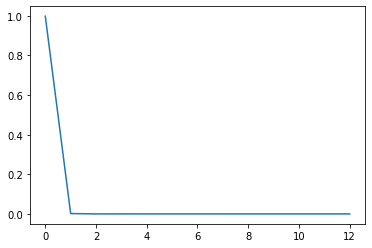

In [19]:
#PCA function from scikit learn

pca = PCA(n_components=13) #Using all features
pca.fit(Wine) #pca.fit standardize the data

print(pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)


In [20]:
#Print principal components (Eiegen vectors)

print(np.round(pca.components_,2))

[[ 0.   -0.    0.   -0.    0.02  0.    0.   -0.    0.    0.    0.    0.
   1.  ]
 [ 0.    0.    0.    0.03  1.    0.   -0.   -0.    0.01  0.02 -0.   -0.
  -0.02]
 [-0.02 -0.12 -0.05 -0.94  0.03  0.04  0.09 -0.01  0.02 -0.29  0.03  0.07
  -0.  ]
 [-0.14 -0.16  0.01  0.33  0.01  0.07  0.17 -0.01  0.05 -0.88  0.06  0.18
   0.  ]
 [ 0.02 -0.61  0.02  0.06 -0.01  0.32  0.52 -0.03  0.25  0.33  0.05  0.26
  -0.  ]
 [ 0.19  0.74  0.04 -0.02 -0.    0.28  0.43 -0.02  0.24  0.   -0.02  0.29
  -0.  ]
 [-0.92  0.15 -0.05 -0.03 -0.    0.02  0.04  0.    0.31  0.11 -0.03 -0.1
   0.  ]
 [-0.28  0.06  0.15 -0.02  0.    0.18  0.25 -0.01 -0.87  0.08  0.    0.19
  -0.  ]
 [-0.09 -0.02 -0.07 -0.    0.   -0.26 -0.38 -0.04  0.05  0.1  -0.03  0.87
   0.  ]
 [-0.   -0.02 -0.09  0.   -0.    0.85 -0.52  0.04  0.01 -0.02 -0.04  0.02
   0.  ]
 [-0.01 -0.02  0.95 -0.05 -0.    0.01 -0.13  0.2   0.14 -0.01  0.1   0.03
  -0.  ]
 [-0.02  0.07 -0.13  0.01  0.    0.   -0.04  0.15 -0.01  0.05  0.98  0.01
  -0.  ]
 [ 0.01 -

In [21]:
#A new pca with only two features

pca = PCA(n_components=2) #Using two features

pca.fit(Wine) #pca.fit standardize the data

WineT = pca.transform(Wine)

print(WineT[0:5,...]) #Printing first 5 rows

[[318.56297929  21.49213073]
 [303.09741966  -5.36471768]
 [438.06113292  -6.53730945]
 [733.24013935   0.19272903]
 [-11.5714285   18.48999461]]


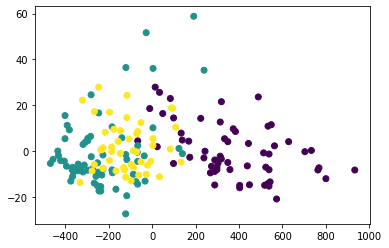

In [22]:
#Lets plot the data

plt.scatter(WineT[...,0],WineT[...,1], c = labels)


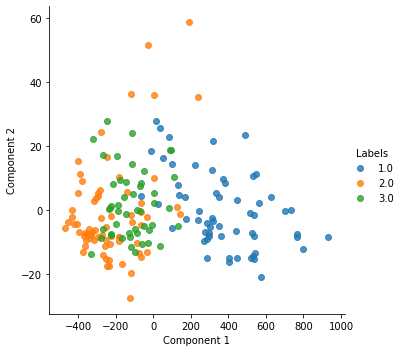

In [23]:
#Let;s plot the data nicely

WineFrame = pd.DataFrame({'Component 1': WineT[:, 0], 'Component 2': WineT[:, 1], 'Labels':labels})
WineFrame['Labels'] = WineFrame.Labels.astype('category')

sns.lmplot(x='Component 1',y='Component 2', hue = 'Labels', data = WineFrame, fit_reg=False)


In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Wine)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.134607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.610664
[t-SNE] KL divergence after 300 iterations: 0.109094


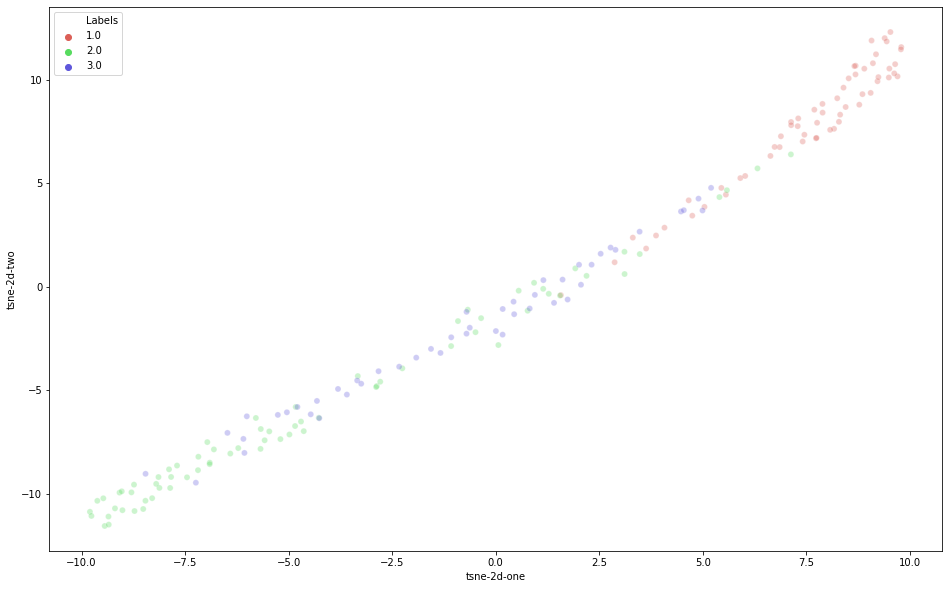

In [39]:
Wine2 = pd.DataFrame()
Wine2['tsne-2d-one'] = tsne_results[:,0]
Wine2['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = Wine2["tsne-2d-one"], y = Wine2["tsne-2d-two"],
    hue=WineFrame["Labels"],
    palette=sns.color_palette("hls", 3),
    data=Wine2,
    legend="full",
    alpha=0.3
)